In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Se buscará primero determinar cómo está el panorama de Internet para el año 2023 y cómo el acceso al servicio de Televisión se ha visto afectado, partiendo de la premisa de que desde la llegada de Internet y los servicios de streaming, la Televisión ha decaído y cada vez menos hogares la están usando, por lo que se asume que el número de personas que usan el servicio de Televisión deberá ser mucho menor que aquellos que tengan Internet contratada.
Se cargarán los datos de internet como son:
- Las velocidades
- Los accesos por tecnologías
- Mbps medios de bajada por provincia
- La penetración de internet por población y hogares
- Ingresos totales

Una vez obtenida y limpiada esta información para el internet, se procederá a revisar la Televisión, la cual se encuentra en el archivo `television_EDA.ipynb`, en particular:
- Los clientes de TV por provincia 
- La penetración de TV por provincia
- Los ingresos totales
- Las tecnologías usadas para el servicio de TV

In [2]:
internet_velocidad = pd.read_excel('data/Internet.xlsx', sheet_name='Velocidad_sin_Rangos')
internet_tecnologias = pd.read_excel('data/Internet.xlsx', sheet_name='Accesos Por Tecnología')
internet_mbps = pd.read_excel('data/Internet.xlsx', sheet_name='Velocidad % por prov')
internet_penetracion = pd.read_excel('data/Internet.xlsx', sheet_name='Penetracion-totales')
internet_ingresos = pd.read_excel('data/Internet.xlsx', sheet_name='Ingresos ')

Para facilitar el análisis, se comenzará por hacer un drop de todas las filas que contentan algún dato nulo o que no aporte información relevante. Además, a fin de simplificar los datos, se considerarán sólo las tendencias anuales, por tanto los trimestres no se tendrán en cuenta para estos análisis.

In [3]:
internet_velocidad.dropna(inplace=True)
internet_tecnologias.dropna(inplace=True)
internet_mbps.dropna(inplace=True)
internet_penetracion.dropna(inplace=True)
internet_ingresos.dropna(inplace=True)

## 1. Limpieza y agrupamientos
Se comienza realizando una limpieza de datos y agrupando los datos, ya que los archivos están en un formato wide, por lo que las agrupaciones ayudarán más adelante cuando se visualicen los datos y se haga el dashboard.

In [4]:
internet_velocidad.describe()

,Año,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,2020.500000,2.500000,9905.139423,3.469551,3.966346,1.956731,2236.834936,40.467949,1150.025641,4706.605769,...,6.903846,0.032051,1.818910,0.113782,0.059295,0.006410,0.054487,0.158654,0.012821,0.073718
std,1.907996,1.152846,17973.450593,10.749551,29.632806,14.618851,15902.906210,69.387753,4676.714406,7344.002637,...,76.733746,0.800641,20.254423,1.209195,0.719825,0.079871,0.605151,1.441916,0.159742,0.701533
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,1.000000,589.500000,0.000000,0.000000,0.000000,20.750000,0.000000,0.000000,690.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.500000,2.500000,4467.500000,0.000000,0.000000,0.000000,47.000000,16.000000,4.000000,2003.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,4.000000,13300.750000,1.000000,0.000000,0.000000,82.250000,60.000000,318.000000,5196.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,4.000000,125147.000000,102.000000,225.000000,111.000000,238902.000000,609.000000,35185.000000,49473.000000,...,860.000000,20.000000,227.000000,15.000000,9.000000,1.000000,8.000000,18.000000,2.000000,9.000000


In [5]:
internet_velocidad.head(5)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024.0,1.0,Chubut,16640.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Agrupar por año y provincia para obtener el total de accesos a cada velocidad
velocidad_sin_rangos_summary = internet_velocidad.drop(columns=['Trimestre']).groupby(['Año', 'Provincia']).sum().reset_index()
velocidad_sin_rangos_summary.head(5)

,Año,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2017.0,Buenos Aires,114182.0,0.0,0.0,0.0,3865.0,0.0,35185.0,19861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017.0,Capital Federal,0.0,0.0,0.0,0.0,314.0,0.0,701.0,30710.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017.0,Catamarca,2151.0,0.0,0.0,0.0,34.0,0.0,1.0,3181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017.0,Chaco,1035.0,0.0,0.0,0.0,70.0,0.0,1.0,3431.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017.0,Chubut,0.0,0.0,0.0,0.0,67.0,0.0,3086.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
internet_tecnologias.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [8]:
# Accesos Por Tecnología: Se limpian los datos y agrupan por año y provincia
accesos_tecnologia_df_clean = internet_tecnologias.drop(columns=[col for col in internet_tecnologias.columns if internet_tecnologias[col].isnull().mean() > 0.8])
accesos_tecnologia_summary = accesos_tecnologia_df_clean[['Año','Provincia',	'ADSL',	'Cablemodem',	'Fibra óptica',	'Wireless',	'Otros',	'Total']].groupby(['Año', 'Provincia']).sum().reset_index()
accesos_tecnologia_summary.head(5)

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,2014,Capital Federal,1799146.0,3322198.0,70537.0,7706.0,58891.0,5258478.0
2,2014,Catamarca,98078.0,774.0,65.0,0.0,177.0,99094.0
3,2014,Chaco,214637.0,40621.0,120.0,1.0,237.0,255616.0
4,2014,Chubut,199894.0,2553.0,3505.0,45845.0,26622.0,278419.0


In [9]:
internet_mbps.head(5)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [10]:
# Velocidad % por prov: Se agrupan por año y provincia, se ignoran los trimestres para facilitar la interpretación a largo plazo de las velocidades
velocidad_por_prov_df_clean = internet_mbps.dropna()
velocidad_por_prov_summary = velocidad_por_prov_df_clean[['Año','Provincia','Mbps (Media de bajada)']].groupby(['Año', 'Provincia']).mean().reset_index()
velocidad_por_prov_summary.head(5)

,Año,Provincia,Mbps (Media de bajada)
0,2014,Buenos Aires,3.938247
1,2014,Capital Federal,4.373310
2,2014,Catamarca,2.992319
3,2014,Chaco,3.528954
4,2014,Chubut,3.168178


In [11]:
internet_penetracion.head(5)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


In [12]:
# Penetracion-totales: Se limpian y agrupar por año
penetracion_totales_df_clean = internet_penetracion.drop(columns=['Trimestre','Periodo'])
penetracion_totales_summary = penetracion_totales_df_clean.groupby(['Año']).mean().reset_index()
penetracion_totales_summary.head(5)

,Año,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2014,50.144852,15.259364
1,2015,52.053712,15.916863
2,2016,53.214464,16.335457
3,2017,55.936220,17.207378
4,2018,60.021969,18.515000


In [13]:
internet_ingresos.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [14]:
# Ingresos: Se calcula la suma anual de ingresos por concepto de Internet
ingresos_df_clean = internet_ingresos.drop(columns=['Trimestre','Periodo'])
ingresos_summary = ingresos_df_clean.groupby(['Año']).sum().reset_index()
ingresos_summary.head(5)

,Año,Ingresos (miles de pesos)
0,2014,1.368395e+07
1,2015,2.010881e+07
2,2016,2.686751e+07
3,2017,3.967197e+07
4,2018,5.953959e+07


## 2. Distribuciones de los datos

Una vez limpiados los datos, se buscará entender cómo están distribuidos y así determinar cuáles valores son outliers de modo que puedan descartarse la mayor cantidad de valores que alteren el análisis

In [18]:
velocidad_sin_rangos_summary.head()

,Año,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2017.0,Buenos Aires,114182.0,0.0,0.0,0.0,3865.0,0.0,35185.0,19861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017.0,Capital Federal,0.0,0.0,0.0,0.0,314.0,0.0,701.0,30710.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017.0,Catamarca,2151.0,0.0,0.0,0.0,34.0,0.0,1.0,3181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017.0,Chaco,1035.0,0.0,0.0,0.0,70.0,0.0,1.0,3431.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017.0,Chubut,0.0,0.0,0.0,0.0,67.0,0.0,3086.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# se obtienes las velocidades para poder crear el histograma
vel_sin_rango = velocidad_sin_rangos_summary.copy()
vel_sin_range_melted = vel_sin_rango[(vel_sin_rango['Año']==2023)].melt(id_vars=['Año','Provincia'], var_name='Rango de Velocidad',value_name='Total de Usuarios')

histogram_data = vel_sin_range_melted.groupby('Rango de Velocidad')['Total de Usuarios'].sum().reset_index()
histogram_data = histogram_data.rename(columns={'Rango de Velocidad':'Rango de Velocidad (Mbps)'})
histogram_data['Rango de Velocidad (Mbps)'] = histogram_data['Rango de Velocidad (Mbps)'].str.replace(' Mbps','').str.strip().str.replace(',','.')
# Si la velocidad es igual o superior a 1000 Mbps, asignará esta como 1000, de forma que se pueda aplicar la función cut
histogram_data['Rango de Velocidad (Mbps)'] = histogram_data['Rango de Velocidad (Mbps)'].apply(lambda x: float(x) if x!='Otros' else 1000)
histogram_data['Rango Estimado (Mbps)'] = pd.cut(histogram_data['Rango de Velocidad (Mbps)'], [0,2,10,20,50,100,200,300,500,999,np.inf],labels=['0-2','2-10','10-20','20-50','50-100','100-200','200-300','300-500','500-999','1000+'])
histogram_data.sort_values('Total de Usuarios',ascending=False, inplace=True)

Text(0.5, 1.0, 'Total de Usuarios y su Velocidad de Internet en 2023')

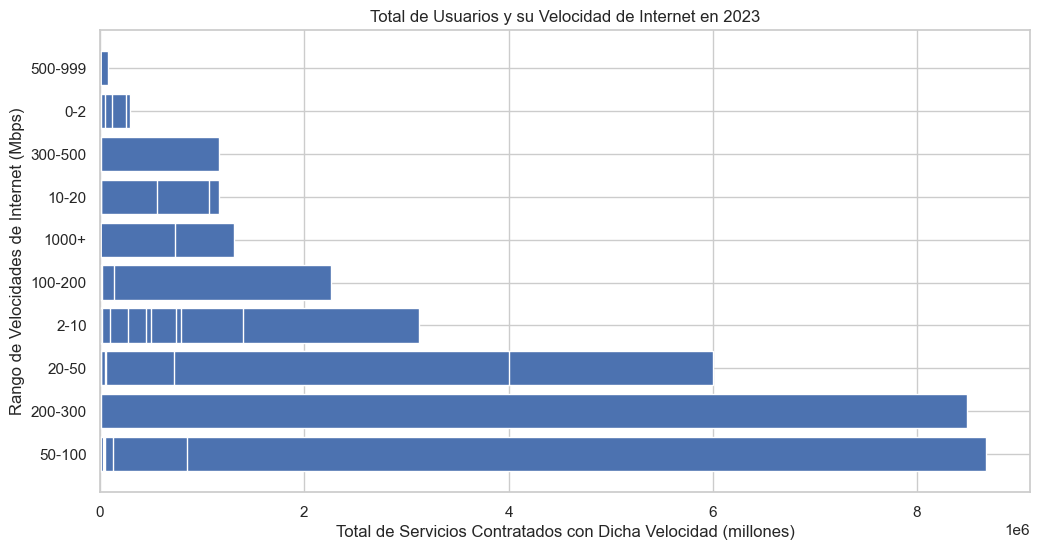

In [118]:
plt.figure(figsize=(12, 6))
plt.barh(y=histogram_data['Rango Estimado (Mbps)'],width=histogram_data['Total de Usuarios'])
plt.ylabel('Rango de Velocidades de Internet (Mbps)')
plt.xlabel('Total de Servicios Contratados con Dicha Velocidad (millones)')
plt.title('Total de Usuarios y su Velocidad de Internet en 2023')

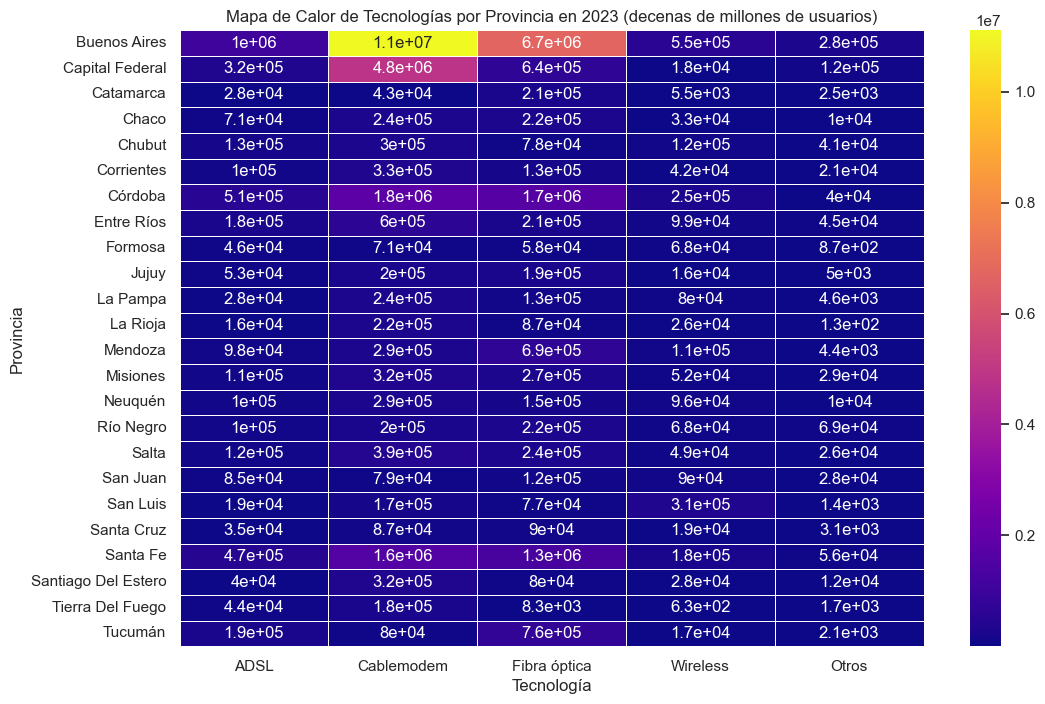

In [143]:
# se hace un nuevo dataframe solo con las tecnologías usadas en 2023, realizando un agrupamiento para omitir también los cálculos por trimestre. Sólo interesa el total por año
tecnologías_2023 = internet_tecnologias[(internet_tecnologias['Año']==2023)][['Provincia','ADSL','Cablemodem','Fibra óptica','Wireless','Otros']]
tecnologías_2023_agrupado = tecnologías_2023.groupby(['Provincia']).sum()
# se tomarán las 15 provincias con mayor cantidad de servicios contratados
tecnologías_2023_agrupado

plt.figure(figsize=(12, 8))
sns.heatmap(tecnologías_2023_agrupado, annot=True, cmap='plasma', linewidths=.5)
plt.title('Mapa de Calor de Tecnologías por Provincia en 2023 (decenas de millones de usuarios)')
plt.xlabel('Tecnología')
plt.ylabel('Provincia')
plt.show()

Del mapa de calor se puede ver que realmente la distribución de tecnologías provincias es muy equitativa. Las únicas excepciones realmente son las provincias de Buenos Aires y Capital Federal, dónde el Cablemodem y la Fibra óptica predominan mucho más. De resto, hay una distribución muy uniforme y casi no hay diferencias. Las únicas excepciones serían Santa Fe y Córdoba, donde hay una leve inclinación usar más el Cablemodem y la Fibra óptica, pero no es una diferencia muy grande.

## 3. Mbps de bajada por provincia

Ya se analizaron las velocidades en Argentina en 2023 y las tecnologías por Provincia. Ahora corresponde investigar qué velocidades fueron las más utilizadas en 2023.

In [146]:
internet_mbps

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.130000
1,2024,1,Capital Federal,229.940000
2,2024,1,Catamarca,91.450000
3,2024,1,Chaco,107.510000
4,2024,1,Chubut,20.500000
...,...,...,...,...
979,2014,1,Santa Cruz,3.315991
980,2014,1,Santa Fe,3.147407
981,2014,1,Santiago Del Estero,2.949472
982,2014,1,Tierra Del Fuego,3.446888


In [162]:
print(f"La velocidad promedio en toda Argentina en 2023 es {round(internet_mbps['Mbps (Media de bajada)'].mean(),2)} Mbps. Mientras que la mediana para el mismo periodo es de {round(internet_mbps['Mbps (Media de bajada)'].median(),2)} Mbps")

La velocidad promedio en toda Argentina en 2023 es 23.19 Mbps. Mientras que la mediana para el mismo periodo es de 9.31 Mbps


Text(0.5, 1.0, 'Velocidad Promedio de Bajada en Mbps en 2023')

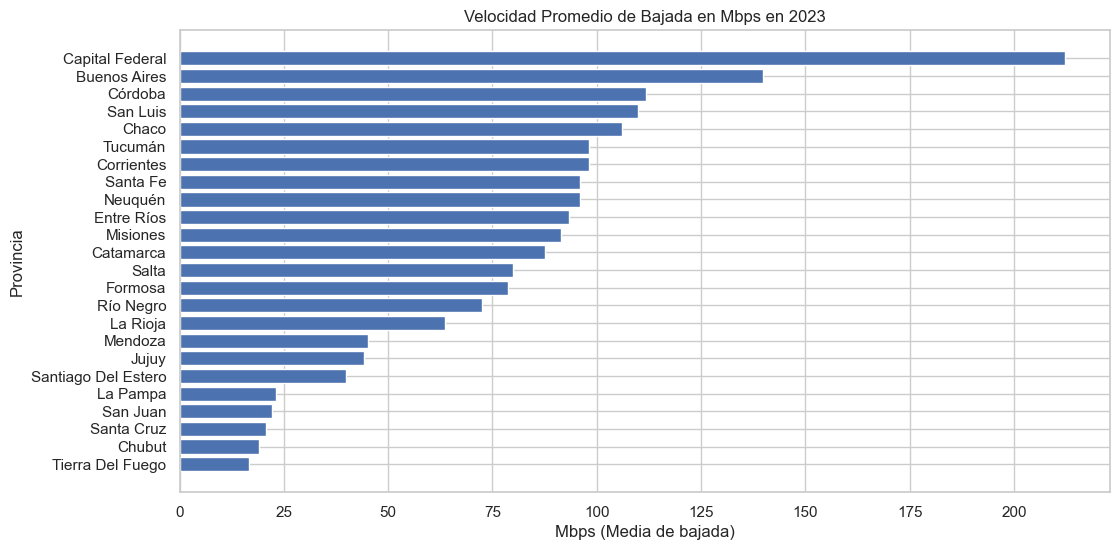

In [158]:
mbps_bajada_2023 = internet_mbps[['Provincia','Mbps (Media de bajada)']][(internet_mbps['Año']==2023)]
mbps_bajada_2023_agrupado = mbps_bajada_2023.groupby('Provincia').mean().sort_values('Mbps (Media de bajada)',ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(y=mbps_bajada_2023_agrupado.index,width=mbps_bajada_2023_agrupado['Mbps (Media de bajada)'])
plt.ylabel('Provincia')
plt.xlabel('Mbps (Media de bajada)')
plt.title('Velocidad Promedio de Bajada en Mbps en 2023')